In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns  

In [127]:
def draw_sep_curve(model, res = 500):
    xx0_min, xx0_max = plt.xlim()
    xx1_min, xx1_max = plt.ylim()
    xx0, xx1 = np.meshgrid(np.linspace(xx0_min, xx0_max, res), np.linspace(xx1_min, xx1_max, res))
    yy = model.predict(np.hstack((np.reshape(xx0, (res**2, 1)), np.reshape(xx1, (res**2, 1)))))   
    yy = yy.reshape(xx0.shape)
    plt.contourf(xx0, xx1, yy, 1, alpha = 0.25, colors = ('b', 'r'))
    plt.contour(xx0, xx1, yy, 1, colors = 'k')
    plt.xlim((xx0_min, xx0_max))
    plt.ylim((xx1_min, xx1_max)) 

In [128]:
from sklearn.datasets import fetch_openml

# Загружаем данные из https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', return_X_y = True, as_frame = False)

In [129]:
N, d = X.shape
N, d #70000 цифр, 784 - картинка из 28*28 пискелей

(70000, 784)

In [130]:
def draw_digit(Img, digit):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (28, 28))) #Выводим написанное число
    plt.text(0, 27, str(digit), color = 'b') #Выводим маленькое число в левом нижнем углу
    plt.set_cmap('binary')  

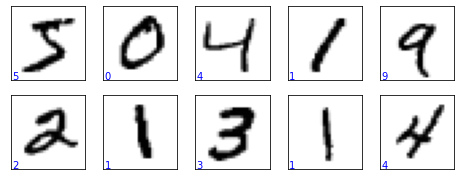

In [131]:
plt.figure(figsize = (8, 3)) 
for i in range(10):
    plt.subplot(2, 5, i+1) #Выводим 2 строчки по 5 картинок
    draw_digit(X[i, :], y[i])

# 1. Метод главных компонент

In [132]:
Xtest = X[0:5000]
Ytest = y[0:5000]

In [133]:
Xtest.shape

(5000, 784)

In [134]:
Ytest.shape

(5000,)

In [135]:
from sklearn.decomposition import PCA

In [136]:
pca = PCA(n_components=2)
pca.fit(Xtest, Ytest)

PCA(n_components=2)

In [137]:
print(pca.explained_variance_ratio_)

[0.09867566 0.07404546]


Доля объясняненной дисперсии при использовании 2 главных компонент очень маленькая


In [138]:
principalComponents = pca.fit_transform(Xtest)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])

In [139]:
principalDf.insert(2, "Ytest", Ytest)

In [140]:
principalDf

,P1,P2,Ytest
0,116.148054,368.837598,5
1,1037.283064,386.480931,0
2,-28.452576,-453.375534,4
3,-877.069746,596.104831,1
4,-357.767729,-687.256077,9
...,...,...,...
4995,-370.185538,-648.677544,7
4996,357.876766,949.110848,3
4997,474.479910,181.332190,2
4998,-850.333291,255.440947,1


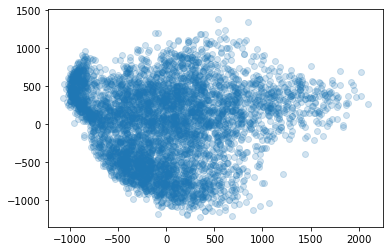

In [141]:
plt.scatter(principalDf['P1'], principalDf['P2'], alpha=0.2)

<AxesSubplot:xlabel='P1', ylabel='P2'>

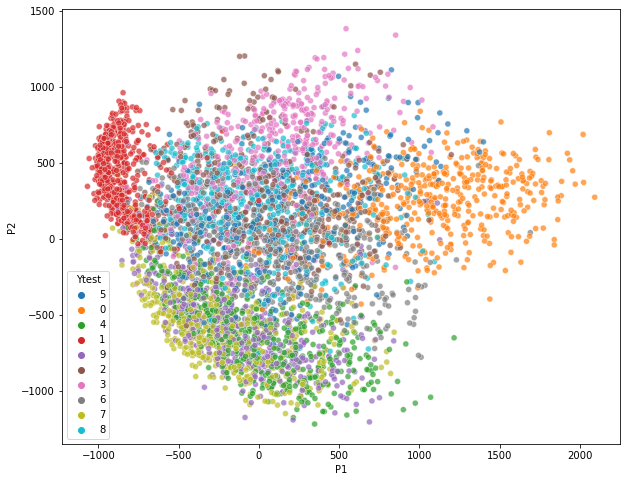

In [142]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x=principalDf['P1'], y=principalDf['P2'], hue=principalDf['Ytest'], alpha=0.7)

Обратим внимание, что при использовании 2 ГК некоторые классы очень даже хорошо отделимы друг от друга, к примеру класс 0 или 1, однако остальные классы смешиваются. Такое поведение наблюдается из-за того что 2 ГК не хватает, доля объясненной диспрессии маленькая

Удалось понизить размерность, для полученной таблицы значений principalDf применим метод - дерево решений

In [143]:
from sklearn import tree
XX = []
for i in range(0,5000,1):
    XX.append([principalDf['P1'][i],principalDf['P2'][i]])
yy = principalDf['Ytest']
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(XX, yy)

DecisionTreeClassifier()

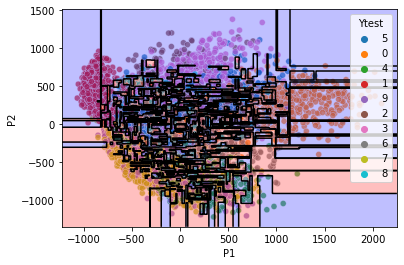

In [144]:
sns.scatterplot(x=principalDf['P1'], y=principalDf['P2'], hue=principalDf['Ytest'], alpha=0.7)
draw_sep_curve(tree_model)